<a href="https://colab.research.google.com/github/rafaelhora/student-scores/blob/main/student_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries and DataFrame

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats.stats import pearsonr

In [ ]:
pwd = os.getcwd()

In [ ]:
#importing data
#kaggle datasets download -d kwadwoofosu/predict-test-scores-of-students api command for dataset 
#source: https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students
dataframe = pd.read_csv(pwd + '\\test_scores.csv')
df = dataframe.copy()
dataframe.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


No null values, so no necessity for value inputing or droping rows

## Exploratory Vizualization 

### <b> Let's first understand the general characteristcs of our student population

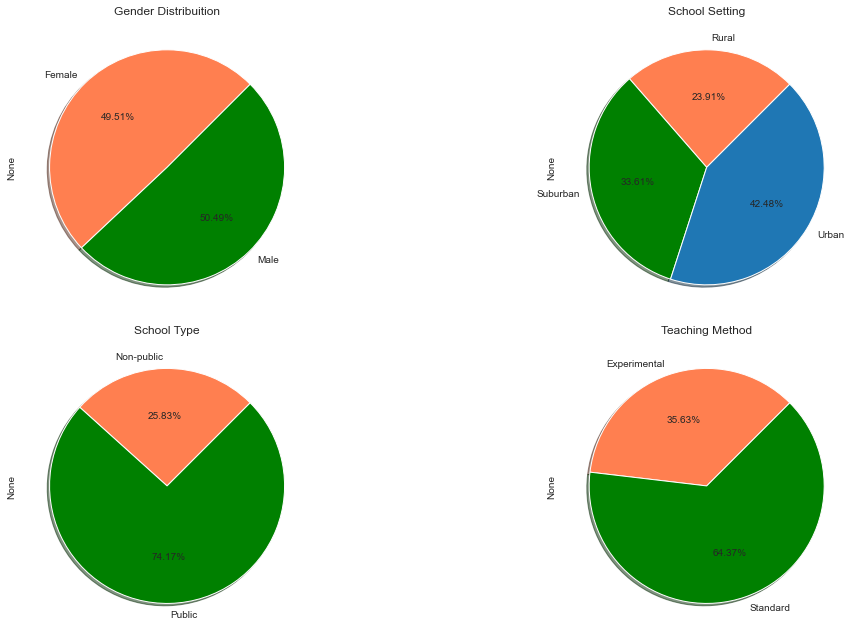

In [ ]:
#plotting general data from population 
fig, ax = plt.subplots(2,2,figsize = [18,9])

cmap = {'coral', 'tab:blue', 'green'}

sns.set_style('whitegrid')

dataframe.groupby('gender').size().plot(kind = 'pie', autopct= '%1.2f%%', shadow = True, startangle = 45 , title = 'Gender Distribuition',ax = ax[0,0], colors = cmap)
dataframe.groupby('school_setting').size().plot(kind = 'pie', autopct= '%1.2f%%', shadow = True, startangle = 45 ,title = 'School Setting', ax = ax[0,1], colors = cmap)
dataframe.groupby('school_type').size().plot(kind = 'pie', autopct= '%1.2f%%', shadow = True, startangle = 45, title = 'School Type', ax = ax[1,0], colors = cmap)
dataframe.groupby('teaching_method').size().plot(kind = 'pie', autopct= '%1.2f%%', shadow = True, startangle = 45, title = 'Teaching Method' , ax = ax[1,1], colors = cmap)


plt.tight_layout()
plt.show()

Some highlights gained by visualizing the general caractheristics of the general population:

- Number of studends for each gender are split equally. 
    - Is gender in any way a factor for influencing the test scores? 
<br>
<br>
- The great marjority of students live in Urban/suburban settings. 
    - Does any of these settings influence their performance in the test? 
<br>
<br>
- As expected, most of the students attend public schools. Only 1/4 of the students study in non-public schools. 
    - Does the difference between public and non-public schools scores show a significant gap in education quality? 
<br>
<br>
- 1/3 of the students are in school that practice experimental teaching methods. 
    - Do these novel methods improve students scores?

In [ ]:
#calculating the mean score for each demographic
gender_score = dataframe.groupby('gender').mean()['posttest'].reset_index()
type_score = dataframe.groupby('school_type').mean()['posttest'].reset_index()
lunch_score = dataframe.groupby('lunch').mean()['posttest'].reset_index()
method_score = dataframe.groupby('teaching_method').mean()['posttest'].reset_index()
setting_score = dataframe.groupby('school_setting').mean()['posttest'].reset_index()


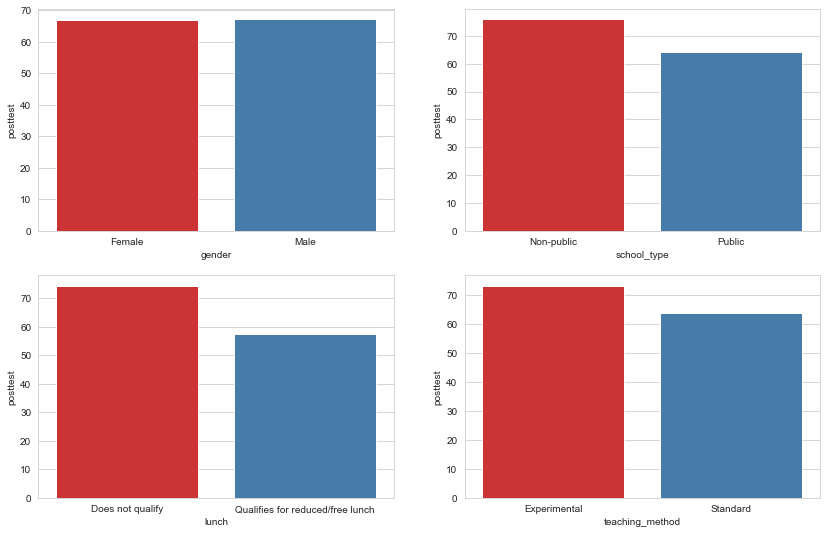

In [ ]:
#plotting averages 
fig, ax = plt.subplots(2,2, figsize = [14, 9])

sns.set_palette('Set1')
sns.barplot(data=gender_score, y = 'posttest', x = 'gender', ax = ax[0,0])
sns.barplot(data=type_score, y = 'posttest', x = 'school_type', ax = ax[0,1])
sns.barplot(data=lunch_score, y = 'posttest', x = 'lunch', ax = ax[1,0])
sns.barplot(data=method_score, y = 'posttest', x = 'teaching_method', ax = ax[1,1])


sns.set_style('whitegrid')
plt.show()

With the comparison of mean score for some properties of the population we can see that:

- Gender appears not to be a relevant factor for test score.

<n>

- Students from public schools have a mean performance gap compared to private school students of more than 15%.

<n>

- Students in poor economic conditions (qualifies for lunch program) have a even more score gap compared with those who don't qualify for reduced/free lunch.

<n>

- Students from schools that use experimental teaching programs have a greater mean score compared to those from Standard schools. 

### <b>Now, we direct our focus onto how school settings affect students performance <b>

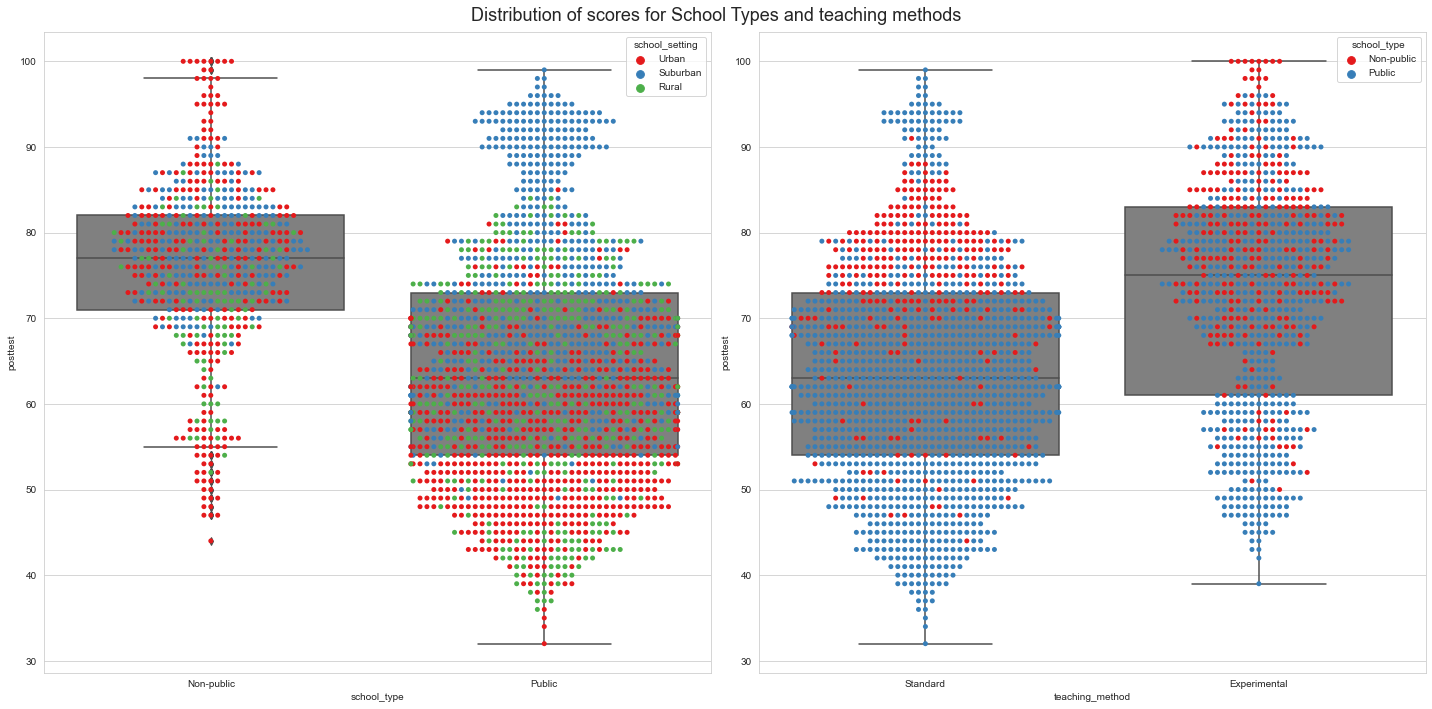

In [ ]:
#checking variance of scores for particular and public schools
fig, ax = plt.subplots(1,2,figsize = [20,10])
sns.swarmplot(data = dataframe ,x = 'school_type', y = 'posttest', ax = ax[0], hue = 'school_setting')
sns.boxplot(data = dataframe ,x = 'school_type', y = 'posttest', ax = ax[0], color = 'grey')

sns.swarmplot(data = dataframe ,x = 'teaching_method', y = 'posttest', ax = ax[1], hue = 'school_type')
sns.boxplot(data = dataframe ,x = 'teaching_method', y = 'posttest', ax = ax[1], color = 'grey')

fig.suptitle("Distribution of scores for School Types and teaching methods", fontsize = 18)
plt.tight_layout()
plt.show()

In relation to school type, we can see that public schools have greater score variance compared to non-public ones. Also, depending on where is located a school can have significantly different results. Public suburban schools seem to excel in performance even compared to the non-public school general score. Since suburban schools have good performance, you could expect urban instituition to at least follow closely behind, however this is not the case. 
<br>
<br>
    The factors on why Urban public schools have been notably underperforming. Questions to be raised: 
    <br>
    <br>
    - What is the HDI level of these urban and suburban neighborhoods? <br>
    - Urban schools are receiveing proper funding? <br>
    - Is this difference caused by teaching methods? <br>
<br>
<br>

In comparison between teaching methodology, it's possible to see the advantage in scores that was already observed. One thing to note is that in the group of schools with novel methods, the top 50% of performants are well distribuited between public and non-public schools. 
<br>
<br>

It is imperative to answer the questions below:

<br>
<br>
 - What are the experimental methods that these public schools are implementing? <br>
 - Can they be reproduced in low performance standard schools in a attempt to improve their learning?<br>

<b>Also note</b> 
<br>
<br>
    - Some experimental schools are having scores below the 2nd quartile of Standard schools. Most of them are public. <br>
    - Comparing to past performance, there was any improvement? <br>
    - Consider reviewing those methods. <br>

---

### <b> Relation beteween pre-test and test scores

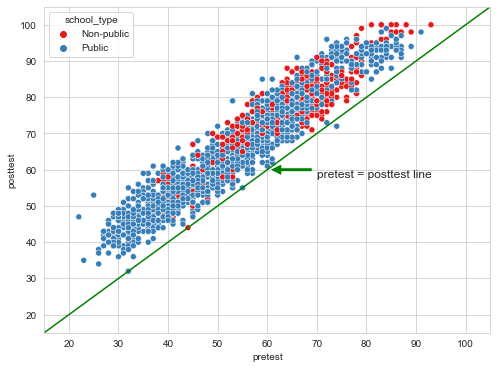

In [ ]:
#correlation between pre-test and post-test scores
x = np.linspace(0, 120, 100)
y = np.linspace(0, 120, 100)

fig, ax = plt.subplots(figsize = [8,6])

sns.scatterplot(x = dataframe['pretest'], y = dataframe['posttest'], hue =dataframe['school_type'])
plt.plot(x, y, color = 'green')

plt.annotate(xy = (60,60), text = 'pretest = posttest line', xytext = (50,0), xycoords = 'data', textcoords = 'offset points', arrowprops = dict(facecolor='green', shrink=0.05),
            horizontalalignment='left', verticalalignment='top', fontsize = 12)

plt.xlim(15, 105)
plt.ylim(15, 105)
plt.show()

<b>It's clear that, deriving from pre-test performance, we can expect at least similar or more likely higher scores at the real test. 

### <b> Visualizing performance per school

What are the characteristics of the best and worse schools?

In [ ]:
#Visualizing School performance
school_ranking = dataframe.groupby('school').agg(posttest = ('posttest', 'mean'), School_Type = ('school_type', pd.Series.mode), teaching = ('teaching_method', pd.Series.mode), school_setting = ('school_setting', pd.Series.mode), 
            n_student = ('n_student', pd.Series.mean) ).reset_index()
school_ranking.sort_values('posttest', ascending= False, ignore_index=True, inplace=True)
school_ranking.rename(columns={'school': 'School Name', 'posttest': 'Test Avg Score', 'School_Type':'School Type', 'teaching': 'Teaching Method', 'school_setting':'School Setting', 'n_student':'Avg students per class' }, inplace=True)
school_ranking

,School Name,Test Avg Score,School Type,Teaching Method,School Setting,Avg students per class
0,UKPGS,91.164062,Public,Standard,Suburban,21.593750
1,IDGFP,87.223404,Non-public,Standard,Urban,19.063830
2,ZMNYA,81.608696,Public,Experimental,Suburban,23.028986
3,UUUQX,79.261905,Non-public,Standard,Suburban,16.976190
4,FBUMG,78.608696,Non-public,Experimental,Rural,15.565217
5,CCAAW,78.110092,Non-public,Experimental,Suburban,18.412844
6,CIMBB,76.945946,Non-public,Standard,Urban,18.648649
7,LAYPA,73.508772,Public,Standard,Rural,19.140351
8,UAGPU,71.873563,Public,Standard,Suburban,21.781609
9,ANKYI,71.390244,Non-public,Standard,Urban,20.512195


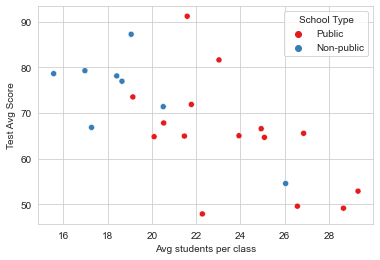

In [ ]:
sns.scatterplot(data=school_ranking, x = 'Avg students per class', y = 'Test Avg Score', hue = 'School Type')

plt.show()

We can't conclude yet the relation between number of students per class and score, but it already resembles a negative correlation. 

In [ ]:
corr = pearsonr(dataframe['posttest'], dataframe['n_student'])
f'Pearson correlation: {corr}' 

'Pearson correlation: (-0.5048864411228163, 2.355155642362062e-138)'

<b>Using Pearson Coefficient we can conclude that the number off students per class and test score has a very high inverse correlation, with a p-value close to zero indicating a significant statistical relevance for the result. 

## Predicting Student Score

### <b> Dataset preparation

In [ ]:
df = dataframe.copy()

In [ ]:
#dropping non-significant columns for this regression
df.drop(columns='student_id', inplace=True)

#encoding categorical variables
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

ct_be = ce.BinaryEncoder(cols =['school', 'school_setting', 'classroom'], return_df=True)
df_encoded = ct_be.fit_transform(df)#Using binary encoding for variables with high number of categories 
ct_oe = ce.OrdinalEncoder(cols = ['school_type', 'teaching_method', 'gender', 'lunch'], return_df=True, 

mapping = [{'col': 'school_type', 'mapping': {'Non-public': 0, 'Public':1}}, 
{'col':'teaching_method', 'mapping':{'Experimental':1, 'Standard':0}}, 
{'col':'gender', 'mapping': {'Female':1, 'Male':0}}, 
{'col':'lunch', 'mapping': {'Does not qualify':0, 'Qualifies for reduced/free lunch':1}}]) 

df_encoded = ct_oe.fit_transform(df_encoded)#ordinal encoding for 0 or 1 variables

df_encoded[['school_type', 'teaching_method', 'gender', 'lunch']] = df_encoded[['school_type', 'teaching_method', 'gender', 'lunch']].apply(pd.to_numeric)

C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


### <b> Visualizing dataset_encoded

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school_0          2133 non-null   int64  
 1   school_1          2133 non-null   int64  
 2   school_2          2133 non-null   int64  
 3   school_3          2133 non-null   int64  
 4   school_4          2133 non-null   int64  
 5   school_5          2133 non-null   int64  
 6   school_setting_0  2133 non-null   int64  
 7   school_setting_1  2133 non-null   int64  
 8   school_setting_2  2133 non-null   int64  
 9   school_type       2133 non-null   int32  
 10  classroom_0       2133 non-null   int64  
 11  classroom_1       2133 non-null   int64  
 12  classroom_2       2133 non-null   int64  
 13  classroom_3       2133 non-null   int64  
 14  classroom_4       2133 non-null   int64  
 15  classroom_5       2133 non-null   int64  
 16  classroom_6       2133 non-null   int64  


In [ ]:
df_encoded

,school_0,school_1,school_2,school_3,school_4,school_5,school_setting_0,school_setting_1,school_setting_2,school_type,...,classroom_4,classroom_5,classroom_6,classroom_7,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,20.0,1,0,62.0,72.0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,20.0,1,0,66.0,79.0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,20.0,0,0,64.0,76.0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,20.0,1,0,61.0,77.0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,20.0,0,0,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0,1,0,1,1,1,0,0,1,1,...,0,0,0,1,0,30.0,1,0,39.0,55.0
2129,0,1,0,1,1,1,0,0,1,1,...,0,0,0,1,0,30.0,1,1,38.0,46.0
2130,0,1,0,1,1,1,0,0,1,1,...,0,0,0,1,0,30.0,1,1,45.0,51.0
2131,0,1,0,1,1,1,0,0,1,1,...,0,0,0,1,0,30.0,0,1,46.0,53.0


### <b> Splitting Trainning and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xg

#Split features and labels
X, y = df_encoded.iloc[:, :-1], df_encoded.iloc[:, -1]
  
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#transforming objects into DMatrix data
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)


In [ ]:
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)

### <b> Trainning XGBRegressor model

In [ ]:
#trainning xboost regressor
params = {'booster':'gblinear', 'objective': 'reg:squarederror'}
reg = xg.train(dtrain = train_dmatrix, params = params, num_boost_round = 500)
y_pred = reg.predict(test_dmatrix)

## Results and performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE :% f " %(rmse))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
x = 1 - r2
y = (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)
adjusted_r2 = 1 - (x * y)
print('R2 Score:% f' %(r2), '| Adjusted-R2:% f' %(adjusted_r2))

RMSE : 3.264067 
R2 Score: 0.947032 | Adjusted-R2: 0.946454


This model presents a good performance without utilizing more complex techiques such as feature reduction, and hyperparameter tunning. With R2 and Adjusted-R2 scores being very similar, it has a good bias-variance balance, and not prone to overfitting. 
<br>
<br>
Using the model of the sections above we can predict the score of a certain student, or a whole school using just a few variables. 